# Lab 7: Radar Altimetry Waveform


Instructions:

**Exercise 1** (On `waveforms.data`):

The first column of the file is time in nanoseconds since the altimeter started recording (5.3 × 10−3
seconds). The second column is the recorded power.

1) Load the data

- Load data **<span style="color:black; background-color: yellow">DONE</span>**.
- Plot these waveforms as points. **<span style="color:black; background-color: yellow">DONE</span>**


2) Generate a **model waveform** from the function above and plot it over the waveform data. 

- Estimate the three unknown parameters  A, t0 , and σ **<span style="color:black; background-color: yellow">DONE</span>**

- Questions answered inline along with the code :) **<span style="color:black; background-color: yellow">DONE</span>**
 
**Reference: **

- lecture notes
- additional notes on the interaction between radar and the ocean 
 http://topex.ucsd.edu/rs/altimetry.pdf.


Status:
**<span style="color:black; background-color: yellow">DONE</span>**.
**<span style="color:white; background-color: green">In Progress</span>**.




### A simple model for the expected power as a function of time

Notes: The return power is an error function, which is an intergral of a Gaussian function.

\begin{equation*}
M(t,  t_0,  \sigma,  A)   =  A  \Bigl[1 + erf \Bigl(\frac{t - t_0}{\sqrt{2}
\sigma}\Bigr) \Bigr]
\end{equation*}

$t$ = time since the pulse was transmitted <br />
$t_0$ = arriveal time of the half power point<br />
$\sigma$ = rise time parameter<br />
$A$ = amplitude of the returned waveform<br />


### Altitude of the satellite is:

\begin{equation*}
r = \frac{ct_0}{2}
\end{equation*}

where $c$ = speed of light.

# Imports

In [110]:
import os

from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter
from scipy.special import erf
from scipy.io import loadmat

from sklearn import metrics
#from sklearn.ensemble import RandomForestClassifer
from skimage import io

In [111]:
# os.listdir('./')

## 1.1a) Load the data

In [112]:
data = np.loadtxt('waveforms.dat')

## 1.1b) Plot waveforms as points

### utility functions for plotting (from previous labs)

In [113]:
def label_axes(_plt, x_lab, y_lab, title):
    _plt.xlabel(x_lab,  fontsize=14)
    _plt.ylabel(y_lab, fontsize=14)
    _plt.title(title, fontsize=16)
    _plt.legend(fontsize=10, loc='best')

In [117]:
# this part of the code to plot waveforms is borrowed from
# https://github.com/biavillas/sio236/blob/master/labs/lab07/VillasBoas_Bia_lab7.ipynb
# the documentation is added

# number of given waveforms (from ERS-1 satellite altimeter)
num_waveforms = 20

rows, cols = data.shape # returns (980, 2)
N = rows / num_waveforms #49

# create empty masked np array
forms = np.ma.empty([num_waveforms, N, cols])
# print forms.shape # (20, 49, 2)

In [118]:
for i in np.arange(0, num_waveforms):
    forms[i, :, :] = data[i*N:(i+1)*N,:] 

offset = 5.3e-3 # when the altimeter started recording
scale = 1e-9 # time is in nanoseconds

t = forms[:, :, 0] 
amp = forms[:, :, 1]

# mean value of the power (amplitude)
amp_mean = np.ma.mean(amp, axis=0)

# std_amp = np.ma.std(amp, axis=0)
# se_amp = std_amp / Nf

# average of all times
# t.shape -> (20, 49)
tmean = np.ma.mean(t, axis=0)

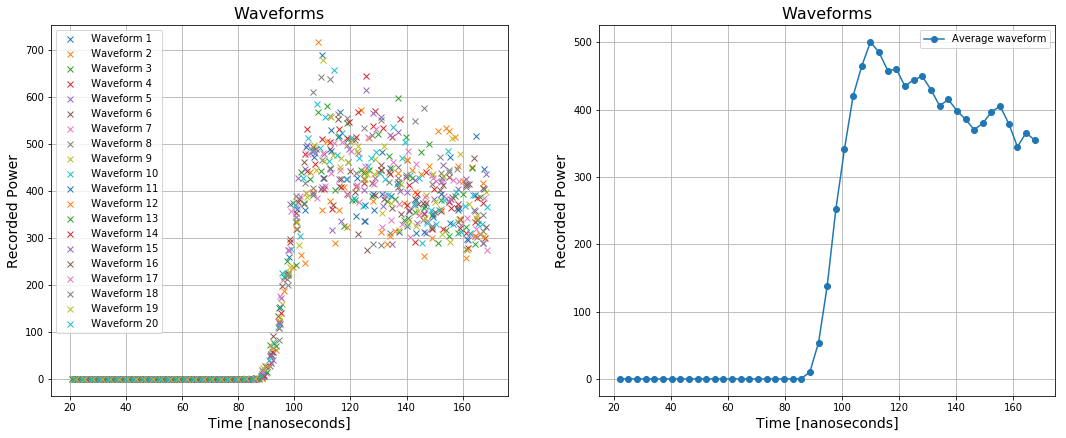

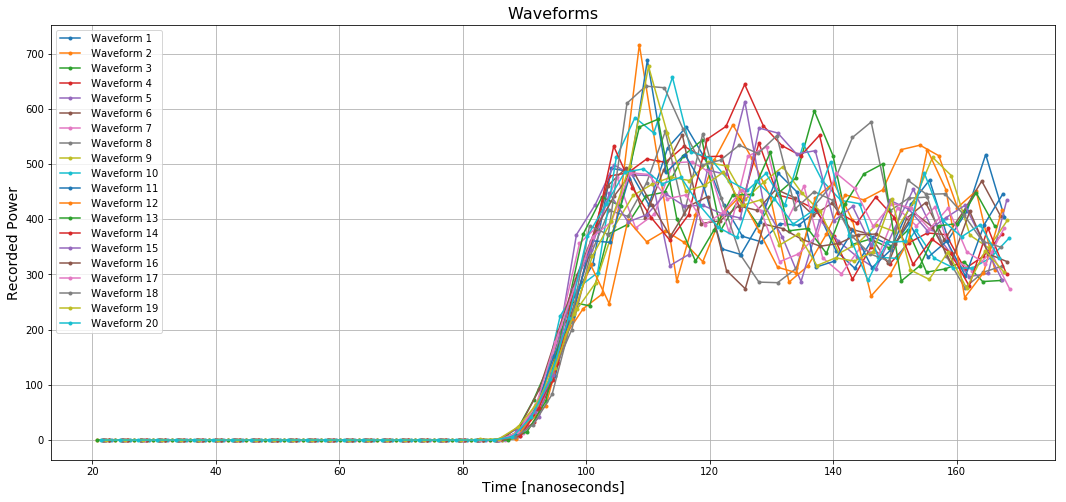

In [119]:
plt.close()
plt.figure(figsize=(18,15))

def plot_all_waveforms(_plt, _num_waveforms, point_shape='-k'):
    for i in range(_num_waveforms):
        _plt.plot(t[i], amp[i], point_shape, label=' Waveform {number}'.format(number=i + 1))

# first plot
plt.subplot(221)
plot_all_waveforms(plt, num_waveforms, point_shape='x')
label_axes(plt, 'Time [nanoseconds]', 'Recorded Power', 'Waveforms')
plt.grid() # show grid lines

# second plot
plt.subplot(222)

# .- connects the dots
# x plots just points as 'x' without connecting

plt.plot(tmean, amp_mean, '-o', label='Average waveform') 
label_axes(plt, 'Time [nanoseconds]', 'Recorded Power', 'Waveforms')
plt.grid()

# show first two plots
plt.show()

# a wider version - for readability
plt.figure(figsize=(18, 8))

plot_all_waveforms(plt, num_waveforms, point_shape='.-')
label_axes(plt, 'Time [nanoseconds]', 'Recorded Power', 'Waveforms')
plt.grid() # show grid lines
plt.show()

## 1.2) Generate a model waveform from the given function

1) plot it over the data


In [120]:
A = amp_mean.max()

In [121]:
t0 = 98
sig = 5.6

In [122]:
sig = 5.5
brown_model = (A/2.)*(1 + erf((tmean-t0)/(np.sqrt(2)*sig)))

### Estimate the three unknown parameters $A$, $t_0$, and $σ$

In [123]:
t.shape

(20, 49)

In [124]:
amp[1].shape

(49,)

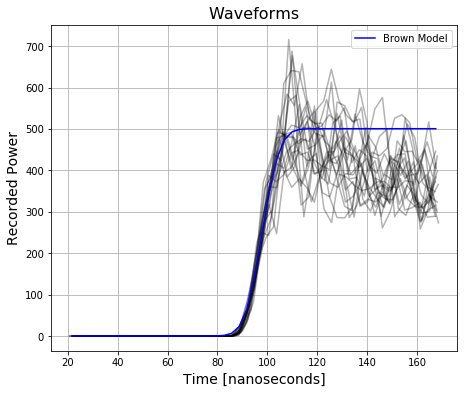

In [125]:
plt.figure(figsize=(16,6))
plt.subplot(121)
# plt.subplot(221)

for i in range(num_waveforms):
    plt.plot(t[i], amp[i], '-k', alpha=.3, linewidth=1.5)
    plt.hold
    
plt.plot(tmean, brown_model, '-b', linewidth = 1.5,label='Brown Model')
plt.legend()
 
label_axes(plt, 'Time [nanoseconds]', 'Recorded Power', 'Waveforms')
plt.grid() # show grid lines

plt.show()

### Question: What is the altitude of the satellite in meters?

to $r = \frac{ct_0}{2}$

\begin{equation*}
t_0 = 98  \times  10^{-9} + 5.3 \times 10^{-3} seconds
\end{equation*}


\begin{equation*}
\sigma = 5.6 \times 10^{-9} seconds
\end{equation*}

to $r = \frac{ct_0}{2}$.

And we get:

**$r$ = $795$ km**

(calculation below)

In [126]:
t_0 = t0 * 10**-9 + offset# convert from ns to s and add offset
c = 3.0 * 10**8
r = c*t_0 /2.0
print r

795014.7


### Question: What is the standard deviation of the ocean wave height in meters?

#$H_s = 2 \sigma c$ 

# Exercise 2: Using Altimetry Data

1. Download the two files *DONE*
2. Answer questions related to Google Earth

Notes from David's matlab file:
<code>
   fid = fopen('durmid.dat','r','l');
   z=fread(fid,[4424,4001],'real*4');
   nx=4424;
   ny=4001;
   </code>

In [127]:
#<f signifies little-endian single-precision float
# sadly, this took some time to figure out 
# durmid = np.fromfile('durmid.dat', dtype='<f')
durmid = np.fromfile('durmid.dat', dtype='<i4')
durmid1 = np.fromfile('durmid.dat', dtype='<u4')
durmid.shape

(17700424,)

In [128]:
# checking array size
17700424 / 4424 == 4001

True

In [129]:
# 2d version (reshaped)
durmid_2d = durmid1.reshape(4424, 4001)

In [130]:
# mask invalid (nan values)
z = np.ma.masked_invalid(durmid_2d)
z[0]

masked_array(data = [3265904312L 3265897344L 3265900166L ..., 2147483647L 2147483647L
 2147483647L],
             mask = [False False False ..., False False False],
       fill_value = 999999)

In [131]:
#np.loadtxt('durmid.dat') not working

In [132]:
# not needed
# # find locations with nan. This is raising error when making histograms
# np.argwhere(np.isnan(durmid))

# Plot contour

In [133]:
from pylab import *
from scipy.io import netcdf_file as netcdf
data = netcdf('durmid.grd','r').variables['z'][::-1]
#data.shape

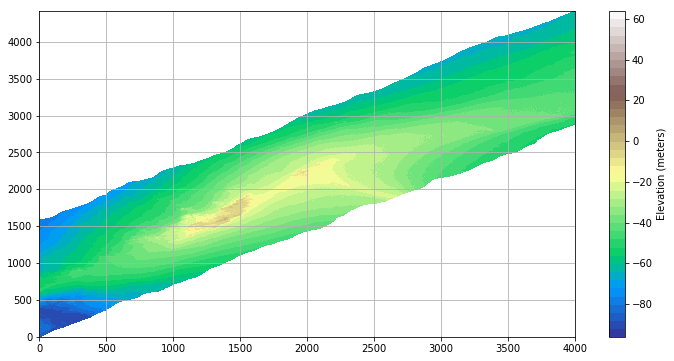

In [134]:
# plot contour
plt.figure(figsize=(12, 6))
#plt.subplot(121)
plt.contourf(data, 40, cmap=plt.cm.terrain)
plt.grid()

# add color bar
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('Elevation (meters)')
plt.show()

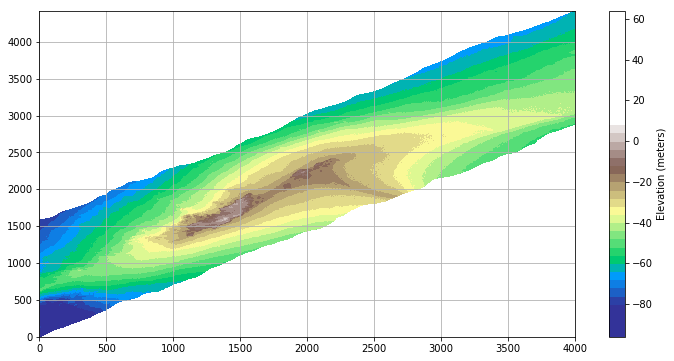

In [145]:
plt.figure(figsize=(12, 6))
#plt.subplot(121)
plt.contourf(data, 40, cmap=plt.cm.terrain)
plt.grid()

# add color bar
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('Elevation (meters)')
plt.clim(-80, 10)
plt.show()

# Plot histogram

In [136]:
data_no_nan = data[~np.isnan(data)]
hist_topo, bins = np.histogram(data_no_nan, 1200)

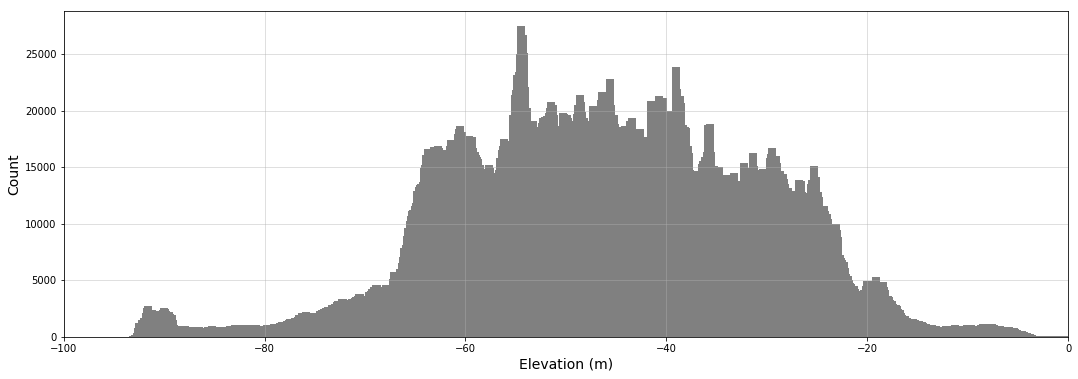

In [151]:
fig = plt.figure(figsize=(18,6))
plt.bar(bins[:-1], hist_topo,  edgecolor='none', color='gray')

plt.xlim([-100 ,0])
# label_axes(plt, 'Elevation (meters)', 'Count', 'Elevation Histogram')
plt.xlabel('Elevation (m)',  fontsize=14)
plt.ylabel('Count', fontsize=14)

ax = fig.add_subplot(1,1,1)                                                      

# major ticks every 20, minor ticks every 2                                      
major_ticks = np.arange(-100, 0, 20)                                              
minor_ticks = np.arange(-100, 0, 2)                                               

# ax.set_xticks(major_ticks)                                                       
# ax.set_xticks(minor_ticks, minor=True)                                           
# ax.set_yticks(major_ticks)                                                       
# ax.set_yticks(minor_ticks, minor=True)                                          
# and a corresponding grid                                                       
# ax.grid(which='both')                                                            
                              
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)                                                

plt.show()

In [146]:
hist_topo.mean()

5190.0708333333332

In [138]:
# no longer necessary now that dtype is int..
# # remove nan for histogram generation
# durmid_no_nan = durmid[~np.isnan(durmid)]
# hist_topo, bins = np.histogram(durmid_no_nan, 1200)


### 2.3 Questions

Q. Can you see the recessional terraces around Durmid Hill in the shaded altimetry? <br />

Yes

Q. Can you see them in the Google Earth imagery?<br />

Yes

### 2.4

a) Load the topography data  *DONE*

b) Look at it with MATLAB equivalent of $imagsc()$ *DONE*

c) Look at a histogram with 1200 bins (first need to reshape the data into a single column as in Lab 6)  *DONE*


## Questions

Q. Can you see regularly spaced peaks? 

Kind of. 

The elevation of these peaks corresponds to the elevation of the recessional terraces. 

Q. Why? 

Identify the elevation of several of these peaks. 

Elevations include: 

Q. What is the recession rate of Lake Cahuilla? (i.e., how fast did the waters recede?)

Recession rate was around **2m / year** since the peaks are space around 2 meters apart. (median difference)